In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re
import requests
from bs4 import BeautifulSoup
from selenium import webdriver

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page = requests.get(URL)
page.status_code

200

In [10]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [11]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.c46047.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [12]:
name = soup.find('div', class_ = '_4rR01T')
name

<div class="_4rR01T">MOTOROLA e40 (Carbon Gray, 64 GB)</div>

In [14]:
name.text

'MOTOROLA e40 (Carbon Gray, 64 GB)'

In [15]:
rating = soup.find('div', class_ = '_3LWZlK')
rating

<div class="_3LWZlK">4.1</div>

In [16]:
rating.text

'4.1'

In [37]:
price = soup.find('div', class_ = '_30jeq3 _1_WHN1')
price.text

'₹11,499'

In [38]:
ratings_reviews = soup.find('span', class_ = '_2_R_DZ')
ratings_reviews.text

'4,42,437 Ratings\xa0&\xa032,384 Reviews'

In [17]:
specifications = soup.find('div', class_ = 'fMghEO')
specifications.text

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.51 cm (6.5 inch) HD+ Display48MP + 2MP + 2MP | 8MP Front Camera5000 mAh BatteryUNISOC T700 Processor1 Year on Handset and 6 Months on Accessories'

In [18]:
spec = specifications.find_all('li',class_ = 'rgWa7D')
print(len(spec))
print(spec[0].text)
print(spec[1].text)
print(spec[2].text)
print(spec[3].text)
print(spec[4].text)
print(spec[5].text)

6
4 GB RAM | 64 GB ROM | Expandable Upto 1 TB
16.51 cm (6.5 inch) HD+ Display
48MP + 2MP + 2MP | 8MP Front Camera
5000 mAh Battery
UNISOC T700 Processor
1 Year on Handset and 6 Months on Accessories


In [20]:
product_details =  soup.findAll('div', class_ = '_3pLy-c row')
product_details

[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">MOTOROLA e40 (Carbon Gray, 64 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBG2EMWUMUFGSZEJNGZMU_MOBG2EMWUMUFGSZE_"><div class="_3LWZlK">4.1</div></span><span class="_2_R_DZ"><span><span>54,903 Ratings </span><span class="_13vcmD">&amp;</span><span> 5,492 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 1 TB</li><li class="rgWa7D">16.51 cm (6.5 inch) HD+ Display</li><li class="rgWa7D">48MP + 2MP + 2MP | 8MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">UNISOC T700 Processor</li><li class="rgWa7D">1 Year on Handset and 6 Months on Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹7,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->10,999</div><div class="_3Ay6Sb"><span>27% off</span></div></di

In [21]:
len(product_details)

24

In [22]:
for product in product_details:
    
    #title
    name = product.find('div', class_ = '_4rR01T')
    print(name.text)
    
    #rating
    rating = product.find('div', class_ = '_3LWZlK')
    print(rating.text)
    
    # num of ratings and reviews
    ratings_reviews = product.find('span', class_ = '_2_R_DZ')
    print(ratings_reviews.text)
    
    #price
    price = product.find('div', class_ = '_30jeq3 _1_WHN1')
    print(price.text)
    
    #features
    f = []
    m = product.find('ul',class_ = '_1xgFaf')
    for li in m:
        f.append(li.text)
    print(f)
    
    print('-'*100)
    print()

MOTOROLA e40 (Carbon Gray, 64 GB)
4.1
54,903 Ratings & 5,492 Reviews
₹7,999
['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '16.51 cm (6.5 inch) HD+ Display', '48MP + 2MP + 2MP | 8MP Front Camera', '5000 mAh Battery', 'UNISOC T700 Processor', '1 Year on Handset and 6 Months on Accessories']
----------------------------------------------------------------------------------------------------

POCO C31 (Shadow Gray, 64 GB)
4.3
1,81,747 Ratings & 11,137 Reviews
₹9,499
['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '16.59 cm (6.53 inch) HD+ Display', '13MP + 2MP + 2MP | 5MP Front Camera', '5000 mAh Lithium-ion Polymer Battery', 'MediaTek Helio G35 Processor', '1 Year Warranty for Handset, 6 Months for Accessories']
----------------------------------------------------------------------------------------------------

REDMI 9i Sport (Coral Green, 64 GB)
4.3
2,07,886 Ratings & 11,974 Reviews
₹7,199
['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB', '16.59 cm (6.53 inch) HD+ Display', '13MP Re

In [29]:
title = []
rating = []
RnR = []
price = []
features = []
pgno = []


for x in range(1,6):
    start_time = time.time()
    
    url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(x)
    page = requests.get(url)
    page_content = page.text
    soup = BeautifulSoup(page_content)
    
    product_details =  soup.findAll('div', class_ = '_3pLy-c row')
    
    for product in product_details:

        #title
        n = product.find('div', class_ = '_4rR01T')
        if n is None:
            title.append(np.nan)
        else:
            title.append(n.text)

        #rating
        r = product.find('div', class_ = '_3LWZlK')
        if r is None:
            rating.append(np.nan)
        else:
            rating.append(r.text)

        # num of ratings and reviews
        rr = product.find('span', class_ = '_2_R_DZ')
        if rr is None:
            RnR.append(np.nan)
        else:
            RnR.append(rr.text)

        #price
        p = product.find('div', class_ = '_30jeq3 _1_WHN1')
        if p is None:
            price.append(np.nan)
        else:
            price.append(p.text)

        #features
        f = []
        m = product.find('ul',class_ = '_1xgFaf')
        for li in m:
            f.append(li.text)
        features.append(f)
        
        pgno.append(x)
        
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x, end_time - start_time))

Page 1 completed in 0.9685168266296387 seconds
Page 2 completed in 0.8077459335327148 seconds
Page 3 completed in 0.8471651077270508 seconds
Page 4 completed in 0.9386401176452637 seconds
Page 5 completed in 1.5898768901824951 seconds


In [30]:
print(len(title))
print(len(rating))
print(len(price))
print(len(RnR))
print(len(features))
print(len(pgno))

120
120
120
120
120
120


In [31]:
title[0:10]

['MOTOROLA e40 (Carbon Gray, 64 GB)',
 'POCO C31 (Shadow Gray, 64 GB)',
 'REDMI 9i Sport (Coral Green, 64 GB)',
 'vivo Y16 (Steller Black, 64 GB)',
 'POCO C31 (Royal Blue, 64 GB)',
 'MOTOROLA G32 (Mineral Gray, 64 GB)',
 'MOTOROLA G32 (Satin Silver, 64 GB)',
 'vivo Y75 (Moonlight Shadow, 128 GB)',
 'APPLE iPhone 14 (Blue, 128 GB)',
 'MOTOROLA g52 (Charcoal Grey, 128 GB)']

In [32]:
price[0:10]

['₹7,999',
 '₹9,499',
 '₹7,199',
 '₹12,499',
 '₹9,499',
 '₹9,999',
 '₹9,999',
 '₹19,975',
 '₹73,990',
 '₹12,999']

In [33]:
features[0:10]

[['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.51 cm (6.5 inch) HD+ Display',
  '48MP + 2MP + 2MP | 8MP Front Camera',
  '5000 mAh Battery',
  'UNISOC T700 Processor',
  '1 Year on Handset and 6 Months on Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
  '16.59 cm (6.53 inch) HD+ Display',
  '13MP + 2MP + 2MP | 5MP Front Camera',
  '5000 mAh Lithium-ion Polymer Battery',
  'MediaTek Helio G35 Processor',
  '1 Year Warranty for Handset, 6 Months for Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
  '16.59 cm (6.53 inch) HD+ Display',
  '13MP Rear Camera | 5MP Front Camera',
  '5000 mAh Li-Polymer Battery',
  'MediaTek Helio G25 Processor',
  'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.54 cm (6.51 inch) HD+ Display',
  '13MP + 2MP | 5MP Front Camera',
  '5000 mAh Lithium Battery',
  'Mediatek Helio P35 Processor',
  '1 Year of Device & 6 Months for In-Box 

# Data Preparation

In [34]:
df = pd.DataFrame({'Product_Name' : title, 'Price' : price, 'Rating' : rating, 'RnR': RnR,'Features':features, 'Page':pgno})
df

,Product_Name,Price,Rating,RnR,Features,Page
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",1
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews",[4 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,1
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews",[4 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,1
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",1
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews",[4 GB RAM | 64 GB ROM | Expandable Upto 512 GB...,1
...,...,...,...,...,...,...
115,"realme 9i (Prism Blue, 128 GB)","₹13,499",4.5,"25,738 Ratings & 1,531 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",5
116,"POCO M4 Pro 5G (Yellow, 64 GB)","₹14,999",4.3,"32,846 Ratings & 2,935 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",5
117,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)","₹12,999",4.4,"1,07,230 Ratings & 6,142 Reviews","[4 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",5
118,"POCO M4 Pro (Cool Blue, 128 GB)","₹17,999",4.3,"12,366 Ratings & 1,095 Reviews","[8 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",5


In [35]:
df.isnull().sum()

Product_Name    0
Price           0
Rating          0
RnR             0
Features        0
Page            0
dtype: int64

In [36]:
features[:5]

[['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.51 cm (6.5 inch) HD+ Display',
  '48MP + 2MP + 2MP | 8MP Front Camera',
  '5000 mAh Battery',
  'UNISOC T700 Processor',
  '1 Year on Handset and 6 Months on Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
  '16.59 cm (6.53 inch) HD+ Display',
  '13MP + 2MP + 2MP | 5MP Front Camera',
  '5000 mAh Lithium-ion Polymer Battery',
  'MediaTek Helio G35 Processor',
  '1 Year Warranty for Handset, 6 Months for Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 512 GB',
  '16.59 cm (6.53 inch) HD+ Display',
  '13MP Rear Camera | 5MP Front Camera',
  '5000 mAh Li-Polymer Battery',
  'MediaTek Helio G25 Processor',
  'Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.54 cm (6.51 inch) HD+ Display',
  '13MP + 2MP | 5MP Front Camera',
  '5000 mAh Lithium Battery',
  'Mediatek Helio P35 Processor',
  '1 Year of Device & 6 Months for In-Box 

In [37]:
df.Features.apply(lambda x : x[0]).value_counts()

6 GB RAM | 128 GB ROM | Expandable Upto 1 TB      20
4 GB RAM | 64 GB ROM | Expandable Upto 1 TB       15
8 GB RAM | 128 GB ROM | Expandable Upto 1 TB      12
4 GB RAM | 64 GB ROM                              11
4 GB RAM | 128 GB ROM | Expandable Upto 1 TB       8
4 GB RAM | 64 GB ROM | Expandable Upto 512 GB      7
8 GB RAM | 128 GB ROM                              7
6 GB RAM | 128 GB ROM                              6
4 GB RAM | 64 GB ROM | Expandable Upto 256 GB      6
128 GB ROM                                         4
3 GB RAM | 32 GB ROM | Expandable Upto 1 TB        3
8 GB RAM | 128 GB ROM | Expandable Upto 256 GB     3
6 GB RAM | 64 GB ROM | Expandable Upto 1 TB        3
2 GB RAM | 32 GB ROM | Expandable Upto 512 GB      3
32 MB RAM | 32 MB ROM                              2
256 GB ROM                                         2
2 GB RAM | 32 GB ROM                               2
3 GB RAM | 32 GB ROM | Expandable Upto 512 GB      1
64 GB ROM                                     

In [38]:
df.Features.apply(lambda x : x[1]).value_counts()

16.76 cm (6.6 inch) Full HD+ Display                  22
16.71 cm (6.58 inch) Full HD+ Display                 12
17.32 cm (6.82 inch) HD+ Display                      10
16.36 cm (6.44 inch) Full HD+ AMOLED Display           9
16.33 cm (6.43 inch) Full HD+ AMOLED Display           8
16.64 cm (6.55 inch) Full HD+ Display                  7
15.49 cm (6.1 inch) Super Retina XDR Display           6
16.59 cm (6.53 inch) HD+ Display                       6
16.36 cm (6.44 inch) Full HD+ Display                  5
16.51 cm (6.5 inch) HD+ Display                        5
16.54 cm (6.51 inch) HD+ Display                       5
17.02 cm (6.7 inch) HD+ Display                        4
16.26 cm (6.4 inch) Full HD+ AMOLED Display            3
16.76 cm (6.6 inch) HD+ Display                        3
16.94 cm (6.67 inch) Full HD+ Super AMOLED Display     3
16.56 cm (6.52 inch) Display                           2
16.33 cm (6.43 inch) Full HD+ Display                  2
16.43 cm (6.47 inch) Full HD+ A

In [39]:
df.Features.apply(lambda x : x[2]).value_counts()

50MP + 2MP + 2MP | 16MP Front Camera                    13
50MP + 8MP + 2MP | 16MP Front Camera                    12
64MP + 8MP + 2MP | 16MP Front Camera                    11
50MP + 2MP | 8MP Front Camera                            7
12MP + 12MP | 12MP Front Camera                          7
50MP + 8MP | 16MP Front Camera                           7
8MP Rear Camera | 5MP Front Camera                       6
13Mp + AI Lens | 8MP Front Camera                        6
64MP + 8MP + 2MP | 50MP Front Camera                     5
50MP + 8MP + 2MP | 44MP Front Camera                     5
13MP + 2MP | 5MP Front Camera                            5
108MP + 8MP + 2MP | 16MP Front Camera                    4
50MP + 2MP | 5MP Front Camera                            4
50 MP + 2 MP Depth Lens + AI Lens | 8MP Front Camera     4
13MP + 2MP + 2MP | 5MP Front Camera                      3
50MP + 8MP + 2MP | 13MP Front Camera                     3
50MP + 8MP + 2MP | 8MP Front Camera                     

In [40]:
df.Features.apply(lambda x : x[3]).value_counts()

5000 mAh Lithium-ion Polymer Battery           24
5000 mAh Lithium Battery                       20
5000 mAh Lithium Ion Battery                    9
5000 mAh Battery                                8
5000 mAh Lithium Polymer Battery                7
6000 mAh Li-ion Polymer Battery                 6
A15 Bionic Chip, 6 Core Processor Processor     6
4500 mAh Lithium Battery                        5
4050 mAh Lithium Battery                        5
6000 mAh Lithium Polymer Battery                4
5000 mAh Lithium ion Battery                    4
6000 mAh Lithium-ion Polymer Battery            4
6000 mAh Lithium Ion Battery                    3
5000 mAh Li-Polymer Battery                     3
5000 mAh Lithium Ion Polymer Battery            3
800 mAh Lithium Ion Battery                     2
5000 mAh LiPo Battery                           2
5000 mAh Lithium polymer Battery                2
A13 Bionic Chip Processor                       1
4310 mAh Lithium-ion Polymer Battery            1


In [41]:
df.Features.apply(lambda x : x[4]).value_counts()

Qualcomm Snapdragon 680 Processor                                                                                                                     23
Qualcomm Snapdragon 695 5G Processor                                                                                                                   8
Mediatek Helio G96 Processor                                                                                                                           8
Mediatek Dimensity 810 Processor                                                                                                                       7
1 Year Warranty for Phone and 6 Months Warranty for In-Box Accessories                                                                                 6
MediaTek G37 Processor                                                                                                                                 6
Mediatek Helio P35 Processor                                                      

In [42]:
df.Price.value_counts()

₹14,999    13
₹12,999     9
₹8,499      7
₹16,999     6
₹11,999     6
₹27,988     5
₹19,975     5
₹12,499     5
₹9,999      5
₹73,990     4
₹8,899      4
₹16,499     3
₹5,799      3
₹10,999     3
₹18,999     3
₹7,199      3
₹6,999      3
₹11,499     3
₹15,999     2
₹1,299      2
₹9,499      2
₹14,499     2
₹17,999     2
₹83,990     2
₹19,999     2
₹16,990     2
₹7,999      2
₹13,999     1
₹18,489     1
₹6,249      1
₹17,990     1
₹22,999     1
₹15,990     1
₹39,999     1
₹21,999     1
₹19,990     1
₹6,247      1
₹13,499     1
₹20,499     1
Name: Price, dtype: int64

In [43]:
df.Features = df.Features.apply(lambda x : ','.join(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1


In [45]:
df.Features[1]

'4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,16.59 cm (6.53 inch) HD+ Display,13MP + 2MP + 2MP | 5MP Front Camera,5000 mAh Lithium-ion Polymer Battery,MediaTek Helio G35 Processor,1 Year Warranty for Handset, 6 Months for Accessories'

In [1]:
# Processor
processor_regex = re.compile(r'[A-Za-z0-9\s]+Processor')
processor_regex.findall(df.Features[1])

NameError: name 're' is not defined

In [49]:
df['Processor'] = df.Features.apply(lambda x : processor_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor]
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor]
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor]
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor]
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor]


In [50]:
# RAM
RAM_regex = re.compile(r'[A-Za-z0-9\s]+RAM')
RAM_regex.findall(df.Features[1])

['4 GB RAM']

In [51]:
df['RAM'] = df.Features.apply(lambda x : RAM_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor],[4 GB RAM]
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor],[4 GB RAM]
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor],[4 GB RAM]
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM]
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor],[4 GB RAM]


In [52]:
# Storage
storage_regex = re.compile(r'[A-Za-z0-9\s]+ROM')
storage_regex.findall(df.Features[1])

[' 64 GB ROM']

In [53]:
df['Storage'] = df.Features.apply(lambda x : storage_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor],[4 GB RAM],[ 64 GB ROM]
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor],[4 GB RAM],[ 64 GB ROM]
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor],[4 GB RAM],[ 64 GB ROM]
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM]
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor],[4 GB RAM],[ 64 GB ROM]


In [54]:
# Battery
battery_regex = re.compile(r'[A-Za-z0-9\s\-]+Battery')
battery_regex.findall(df.Features[1])

['5000 mAh Lithium-ion Polymer Battery']

In [55]:
df['Battery'] = df.Features.apply(lambda x : battery_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery]
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery]
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Li-Polymer Battery]
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium Battery]
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery]


In [56]:
# Screen Size
screen_regex = re.compile(r'[A-Za-z0-9\s.]+(?:cm|inch|inches)')
screen_regex.findall(df.Features[1])

['16.59 cm', '6.53 inch']

In [57]:
df['Screen_size'] = df.Features.apply(lambda x : screen_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screen_size
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.51 cm, 6.5 inch]"
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery],"[16.59 cm, 6.53 inch]"
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Li-Polymer Battery],"[16.59 cm, 6.53 inch]"
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium Battery],"[16.54 cm, 6.51 inch]"
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery],"[16.59 cm, 6.53 inch]"


In [58]:
# Brand
brand_regex = re.compile(r'^\w+')
brand_regex.findall(df.Product_Name[1])

['POCO']

In [59]:
df['Brand'] = df.Product_Name.apply(lambda x : brand_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screen_size,Brand
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.51 cm, 6.5 inch]",[MOTOROLA]
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery],"[16.59 cm, 6.53 inch]",[POCO]
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Li-Polymer Battery],"[16.59 cm, 6.53 inch]",[REDMI]
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium Battery],"[16.54 cm, 6.51 inch]",[vivo]
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery],"[16.59 cm, 6.53 inch]",[POCO]


In [60]:
# Front camera
camera_regex = re.compile(r'[A-Za-z0-9\s]+Front')
camera_regex.findall(df.Features[1])

[' 5MP Front']

In [61]:
df['Front_camera'] = df.Features.apply(lambda x : camera_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screen_size,Brand,Front_camera
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[UNISOC T700 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.51 cm, 6.5 inch]",[MOTOROLA],[ 8MP Front]
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery],"[16.59 cm, 6.53 inch]",[POCO],[ 5MP Front]
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek Helio G25 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Li-Polymer Battery],"[16.59 cm, 6.53 inch]",[REDMI],[ 5MP Front]
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium Battery],"[16.54 cm, 6.51 inch]",[vivo],[ 5MP Front]
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,[MediaTek G35 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Lithium-ion Polymer Battery],"[16.59 cm, 6.53 inch]",[POCO],[ 5MP Front]


In [62]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x:''.join(x))
df.Storage = df.Storage.apply(lambda x:''.join(x))
df.Brand = df.Brand.apply(lambda x:''.join(x))
df.Battery = df.Battery.apply(lambda x:''.join(x))
df.Front_camera = df.Front_camera.apply(lambda x:''.join(x))

In [63]:
df['ScreenSize_cm'] = df.Screen_size.apply(lambda x : x[0])
df['ScreenSize_inch'] = df.Screen_size.apply(lambda x : x[1])

In [64]:
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screen_size,Brand,Front_camera,ScreenSize_cm,ScreenSize_inch
0,"MOTOROLA e40 (Carbon Gray, 64 GB)","₹7,999",4.1,"54,903 Ratings & 5,492 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,UNISOC T700 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,"[16.51 cm, 6.5 inch]",MOTOROLA,8MP Front,16.51 cm,6.5 inch
1,"POCO C31 (Shadow Gray, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,MediaTek Helio G35 Processor,4 GB RAM,64 GB ROM,5000 mAh Lithium-ion Polymer Battery,"[16.59 cm, 6.53 inch]",POCO,5MP Front,16.59 cm,6.53 inch
2,"REDMI 9i Sport (Coral Green, 64 GB)","₹7,199",4.3,"2,07,886 Ratings & 11,974 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,MediaTek Helio G25 Processor,4 GB RAM,64 GB ROM,5000 mAh Li-Polymer Battery,"[16.59 cm, 6.53 inch]",REDMI,5MP Front,16.59 cm,6.53 inch
3,"vivo Y16 (Steller Black, 64 GB)","₹12,499",4.3,611 Ratings & 45 Reviews,"4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,Mediatek Helio P35 Processor,4 GB RAM,64 GB ROM,5000 mAh Lithium Battery,"[16.54 cm, 6.51 inch]",vivo,5MP Front,16.54 cm,6.51 inch
4,"POCO C31 (Royal Blue, 64 GB)","₹9,499",4.3,"1,81,747 Ratings & 11,137 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 512 GB,...",1,MediaTek G35 Processor,4 GB RAM,64 GB ROM,5000 mAh Lithium-ion Polymer Battery,"[16.59 cm, 6.53 inch]",POCO,5MP Front,16.59 cm,6.53 inch


In [65]:
df.to_csv('Flipkart_phone_data.csv', index = False)

In [125]:
data = df[['Product_Name', 'Brand','Rating', 'Processor','RAM','Storage','Battery','ScreenSize_inch','Front_camera', 'Price']]
data.head()

,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,ScreenSize_inch,Front_camera,Price
0,"realme C25Y (Metal Grey, 64 GB)",realme,4.5,Unisoc T610 Octa Core Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,6.5 inch,8MP Front,"₹10,999"
1,"realme Narzo 50A (Oxygen Green, 64 GB)",realme,4.4,MediaTek Helio G85 Processor,4 GB RAM,64 GB ROM,6000 mAh Battery,6.5 inch,8MP Front,"₹11,499"
2,"realme Narzo 50A (Oxygen Blue, 128 GB)",realme,4.4,MediaTek Helio G85 Processor,4 GB RAM,128 GB ROM,6000 mAh Battery,6.5 inch,8MP Front,"₹12,499"
3,IAIR Basic Feature Dual Sim Mobile Phone with ...,IAIR,4.1,,32 MB RAM,32 MB ROM,2800 mAh Battery,1.77 inch,,"₹1,049"
4,"REDMI 9i (Sea Blue, 64 GB)",REDMI,4.3,MediaTek Helio G25 Processor,4 GB RAM,64 GB ROM,5000 mAh Lithium Polymer Battery,6.53 inch,5MP Front,"₹8,799"


In [126]:
data.Brand.value_counts()

realme      35
IAIR        24
Infinix     16
POCO         7
SAMSUNG      4
MOTOROLA     3
REDMI        3
APPLE        2
LAVA         1
Micromax     1
Name: Brand, dtype: int64

In [127]:
data[data.Brand == 'APPLE']

,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,ScreenSize_inch,Front_camera,Price
41,"APPLE iPhone 12 (Blue, 128 GB)",APPLE,4.7,A14 Bionic Chip with Next Generation Neural En...,,128 GB ROM,,6.1 inch,12MP Front12MP TrueDepth Front,"₹64,999"
60,"APPLE iPhone 12 (Blue, 128 GB)",APPLE,4.7,A14 Bionic Chip with Next Generation Neural En...,,128 GB ROM,,6.1 inch,12MP Front12MP TrueDepth Front,"₹64,999"


In [128]:
data.drop([41,60], axis = 0,inplace = True)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [129]:
data[data.Brand == 'IAIR']['RAM']

3     32 MB RAM
7     32 MB RAM
11    32 MB RAM
15    32 GB RAM
19    32 MB RAM
23    32 MB RAM
27    32 MB RAM
31    32 MB RAM
35    32 MB RAM
39    32 GB RAM
43    32 MB RAM
47    32 MB RAM
51    32 MB RAM
55    32 MB RAM
59    32 MB RAM
63    32 GB RAM
67    32 MB RAM
71    32 MB RAM
75    32 MB RAM
79    32 MB RAM
83    32 MB RAM
87    32 GB RAM
91    32 MB RAM
95    32 MB RAM
Name: RAM, dtype: object

In [130]:
data[data.Brand == 'LAVA']['RAM']

94    4 MB RAM
Name: RAM, dtype: object

In [131]:
data.Brand.value_counts()

realme      35
IAIR        24
Infinix     16
POCO         7
SAMSUNG      4
MOTOROLA     3
REDMI        3
LAVA         1
Micromax     1
Name: Brand, dtype: int64

In [132]:
data.RAM.value_counts()

4 GB RAM     34
32 MB RAM    21
6 GB RAM     16
3 GB RAM      9
8 GB RAM      6
32 GB RAM     4
2 GB RAM      3
4 MB RAM      1
Name: RAM, dtype: int64

In [133]:
data.Price = data.Price.str.replace('₹','').str.replace(',','').astype(float)
data.Rating = data.Rating.astype(float)
data.head(10)

C:\Users\Utkarsh\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,ScreenSize_inch,Front_camera,Price
0,"realme C25Y (Metal Grey, 64 GB)",realme,4.5,Unisoc T610 Octa Core Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,6.5 inch,8MP Front,10999.0
1,"realme Narzo 50A (Oxygen Green, 64 GB)",realme,4.4,MediaTek Helio G85 Processor,4 GB RAM,64 GB ROM,6000 mAh Battery,6.5 inch,8MP Front,11499.0
2,"realme Narzo 50A (Oxygen Blue, 128 GB)",realme,4.4,MediaTek Helio G85 Processor,4 GB RAM,128 GB ROM,6000 mAh Battery,6.5 inch,8MP Front,12499.0
3,IAIR Basic Feature Dual Sim Mobile Phone with ...,IAIR,4.1,,32 MB RAM,32 MB ROM,2800 mAh Battery,1.77 inch,,1049.0
4,"REDMI 9i (Sea Blue, 64 GB)",REDMI,4.3,MediaTek Helio G25 Processor,4 GB RAM,64 GB ROM,5000 mAh Lithium Polymer Battery,6.53 inch,5MP Front,8799.0
5,"REDMI 9i (Nature Green, 64 GB)",REDMI,4.3,MediaTek Helio G25 Processor,4 GB RAM,64 GB ROM,5000 mAh Lithium Polymer Battery,6.53 inch,5MP Front,8799.0
6,"realme Narzo 50i (Carbon Black, 32 GB)",realme,4.5,SC9863A Processor,2 GB RAM,32 GB ROM,5000 mAh Battery,6.5 inch,5MP Front,7499.0
7,IAIR S19,IAIR,4.2,,32 MB RAM,32 MB ROM,2800 mAh Battery,2.4 inch,,1299.0
8,"realme Narzo 50i (Mint Green, 32 GB)",realme,4.5,SC9863A Processor,2 GB RAM,32 GB ROM,5000 mAh Battery,6.5 inch,5MP Front,7499.0
9,"realme C25Y (Metal Grey, 128 GB)",realme,4.5,Unisoc T610 Octa Core Processor,4 GB RAM,128 GB ROM,5000 mAh Battery,6.5 inch,8MP Front,11999.0


In [134]:
regex = re.compile(r'[\d]+')
data['Storage_GB'] = data.Storage.apply(lambda x : ''.join(regex.findall(x))).astype(float)
data['RAM_GB'] = data.RAM.apply(lambda x : ''.join(regex.findall(x))).astype(float)
data.drop(['RAM','Storage'], axis = 1, inplace = True)
data.head(10)

<ipython-input-134-813575e0914c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Storage_GB'] = data.Storage.apply(lambda x : ''.join(regex.findall(x))).astype(float)
<ipython-input-134-813575e0914c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RAM_GB'] = data.RAM.apply(lambda x : ''.join(regex.findall(x))).astype(float)
C:\Users\Utkarsh\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the 

,Product_Name,Brand,Rating,Processor,Battery,ScreenSize_inch,Front_camera,Price,Storage_GB,RAM_GB
0,"realme C25Y (Metal Grey, 64 GB)",realme,4.5,Unisoc T610 Octa Core Processor,5000 mAh Battery,6.5 inch,8MP Front,10999.0,64.0,4.0
1,"realme Narzo 50A (Oxygen Green, 64 GB)",realme,4.4,MediaTek Helio G85 Processor,6000 mAh Battery,6.5 inch,8MP Front,11499.0,64.0,4.0
2,"realme Narzo 50A (Oxygen Blue, 128 GB)",realme,4.4,MediaTek Helio G85 Processor,6000 mAh Battery,6.5 inch,8MP Front,12499.0,128.0,4.0
3,IAIR Basic Feature Dual Sim Mobile Phone with ...,IAIR,4.1,,2800 mAh Battery,1.77 inch,,1049.0,32.0,32.0
4,"REDMI 9i (Sea Blue, 64 GB)",REDMI,4.3,MediaTek Helio G25 Processor,5000 mAh Lithium Polymer Battery,6.53 inch,5MP Front,8799.0,64.0,4.0
5,"REDMI 9i (Nature Green, 64 GB)",REDMI,4.3,MediaTek Helio G25 Processor,5000 mAh Lithium Polymer Battery,6.53 inch,5MP Front,8799.0,64.0,4.0
6,"realme Narzo 50i (Carbon Black, 32 GB)",realme,4.5,SC9863A Processor,5000 mAh Battery,6.5 inch,5MP Front,7499.0,32.0,2.0
7,IAIR S19,IAIR,4.2,,2800 mAh Battery,2.4 inch,,1299.0,32.0,32.0
8,"realme Narzo 50i (Mint Green, 32 GB)",realme,4.5,SC9863A Processor,5000 mAh Battery,6.5 inch,5MP Front,7499.0,32.0,2.0
9,"realme C25Y (Metal Grey, 128 GB)",realme,4.5,Unisoc T610 Octa Core Processor,5000 mAh Battery,6.5 inch,8MP Front,11999.0,128.0,4.0


# Exploratory Data Analysis

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 95
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Product_Name     94 non-null     object 
 1   Brand            94 non-null     object 
 2   Rating           94 non-null     float64
 3   Processor        94 non-null     object 
 4   Battery          94 non-null     object 
 5   ScreenSize_inch  94 non-null     object 
 6   Front_camera     94 non-null     object 
 7   Price            94 non-null     float64
 8   Storage_GB       94 non-null     float64
 9   RAM_GB           94 non-null     float64
dtypes: float64(4), object(6)
memory usage: 8.1+ KB


In [136]:
data.nunique()

Product_Name       61
Brand               9
Rating              8
Processor          19
Battery            11
ScreenSize_inch    11
Front_camera        7
Price              33
Storage_GB          4
RAM_GB              6
dtype: int64

In [137]:
data.describe()

,Rating,Price,Storage_GB,RAM_GB
count,94.000000,94.000000,94.00000,94.000000
mean,4.379787,9114.031915,64.37234,11.882979
std,0.252122,5906.114500,36.44350,12.242932
min,3.800000,999.000000,3.00000,2.000000
25%,4.300000,1299.000000,32.00000,4.000000
50%,4.300000,9299.000000,64.00000,5.000000
75%,4.400000,13374.000000,64.00000,32.000000
max,5.000000,20999.000000,128.00000,32.000000


In [138]:
data.Price.mean()

9114.031914893618

In [139]:
data.Price.max()

20999.0

In [140]:
data.Price.std()

5906.114499638612

In [143]:
data[data.Brand == 'realme']['Price'].mean()

13313.285714285714

In [144]:
data[data.Brand == 'IAIR']['Price'].mean()

1090.6666666666667

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Processor'>

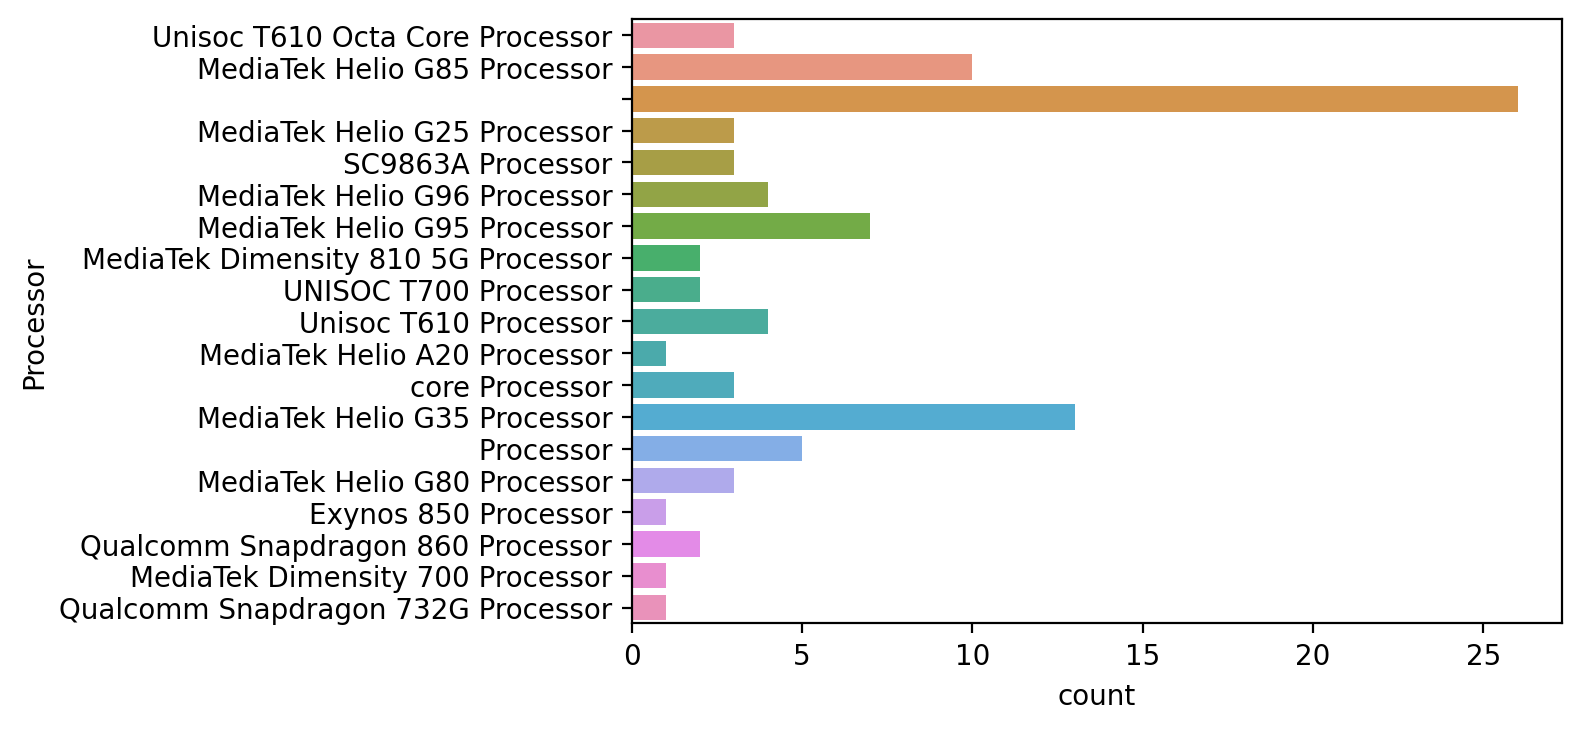

In [145]:
plt.figure(figsize = (6,4),dpi = 200)
sns.countplot(y = data.Processor)

<Figure size 1200x800 with 0 Axes>

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price', ylabel='Brand'>

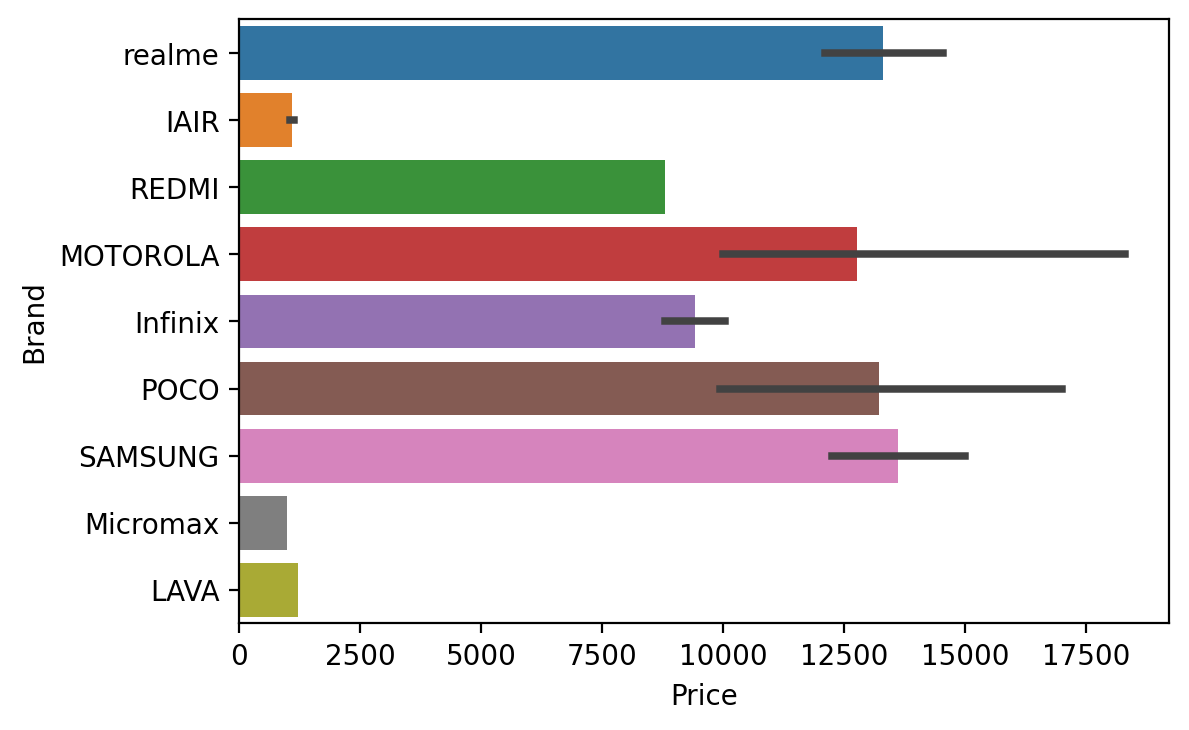

In [147]:
plt.figure(dpi = 200)
sns.barplot(data.Price,data.Brand )

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:xlabel='Price', ylabel='Brand'>

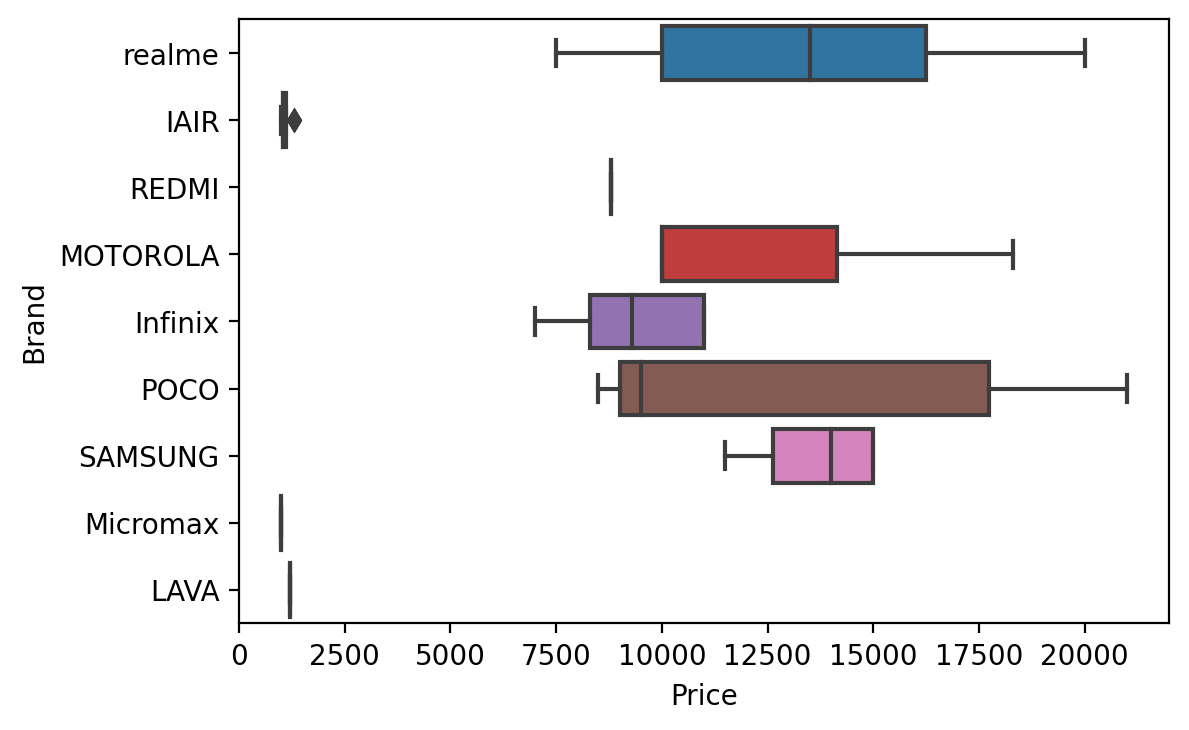

In [149]:
plt.figure(dpi = 200)
sns.boxplot(y = data.Brand, x = data.Price)

<Figure size 2000x1000 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Brand'>

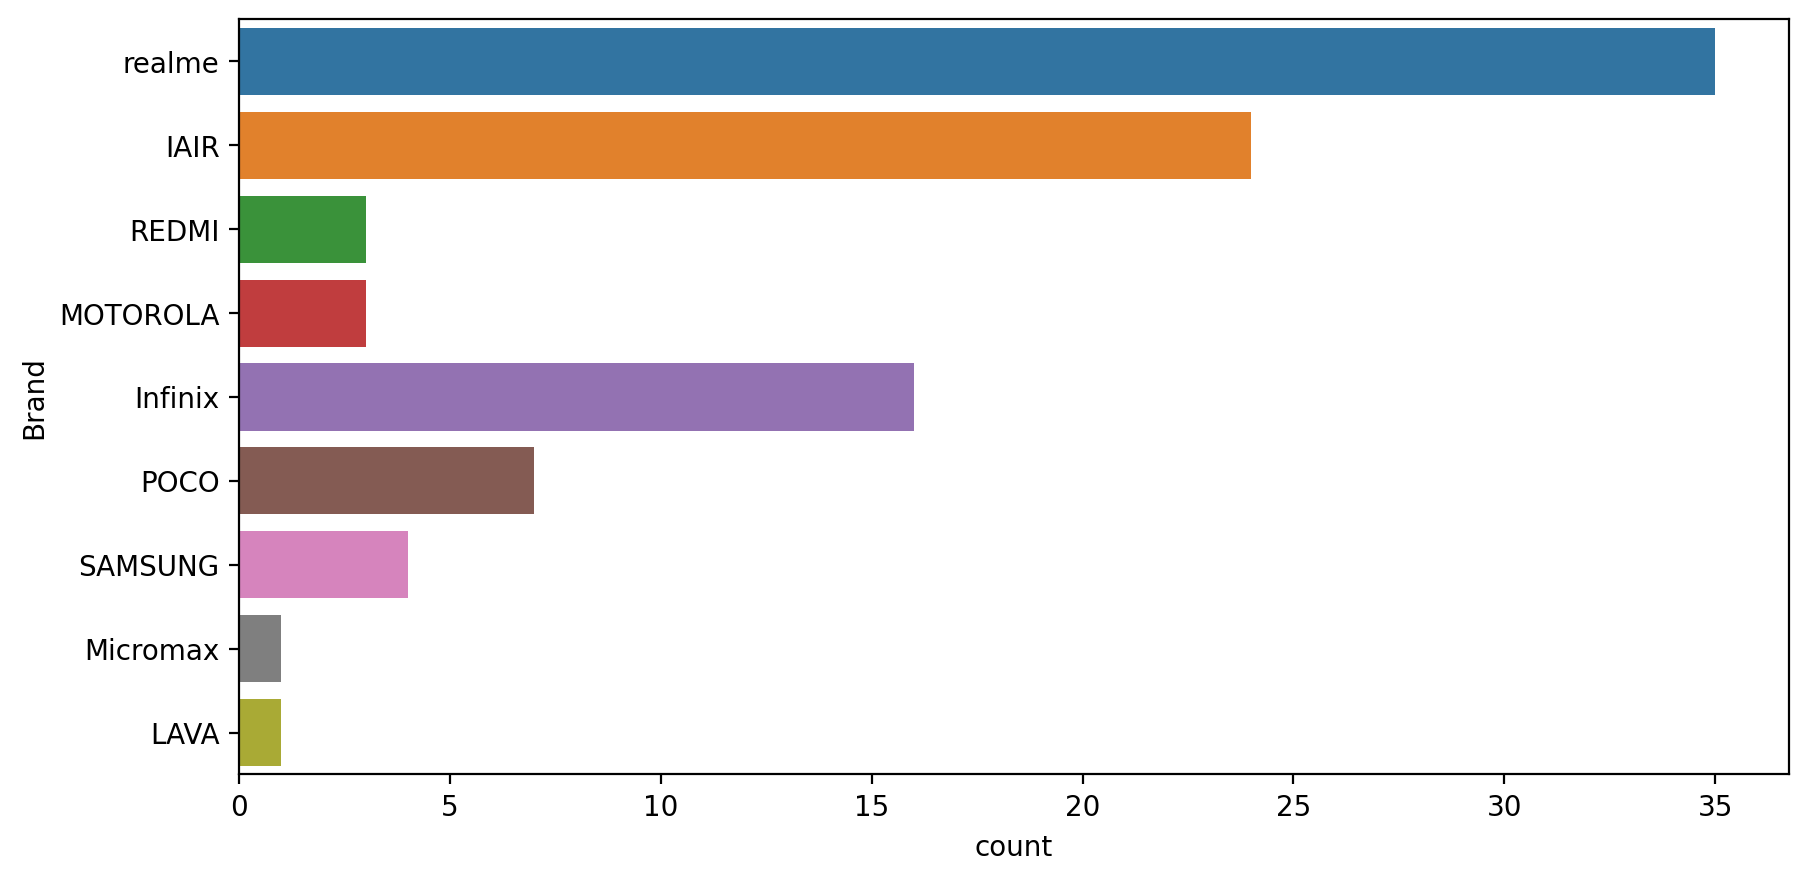

In [150]:
plt.figure(figsize = (10,5),dpi = 200)
sns.countplot(y = data.Brand)

<Figure size 2000x1000 with 0 Axes>

(array([ 3., 27., 12.,  5.,  8.,  7.,  5.,  1.]),
 array([ 6000,  8000, 10000, 12000, 14000, 16000, 18000, 20000, 22000]),
 <BarContainer object of 8 artists>)

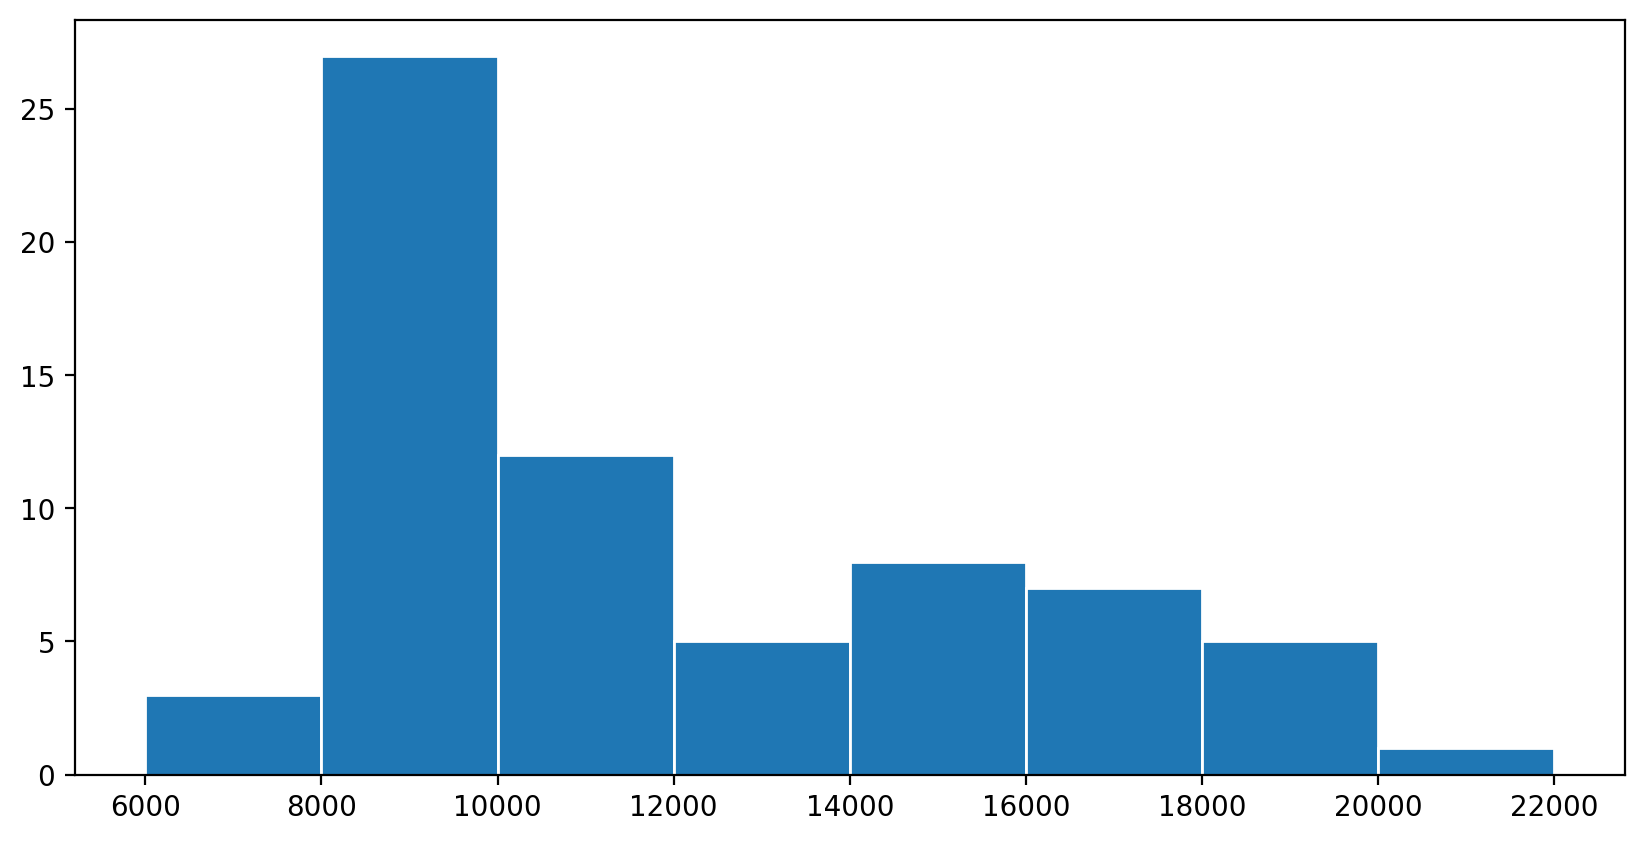

In [151]:
plt.figure(figsize = (10,5),dpi = 200)
plt.hist(data.Price, edgecolor = 'white', bins = range(6000,24000,2000))

<Figure size 1200x800 with 0 Axes>

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ScreenSize_inch', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '6.5 inch'),
  Text(1, 0, '1.77 inch'),
  Text(2, 0, '6.53 inch'),
  Text(3, 0, '2.4 inch'),
  Text(4, 0, '6.6 inch'),
  Text(5, 0, '6.4 inch'),
  Text(6, 0, '6.52 inch'),
  Text(7, 0, '6.82 inch'),
  Text(8, 0, '6.515 inch'),
  Text(9, 0, '6.67 inch'),
  Text(10, 0, '6.78 inch')])

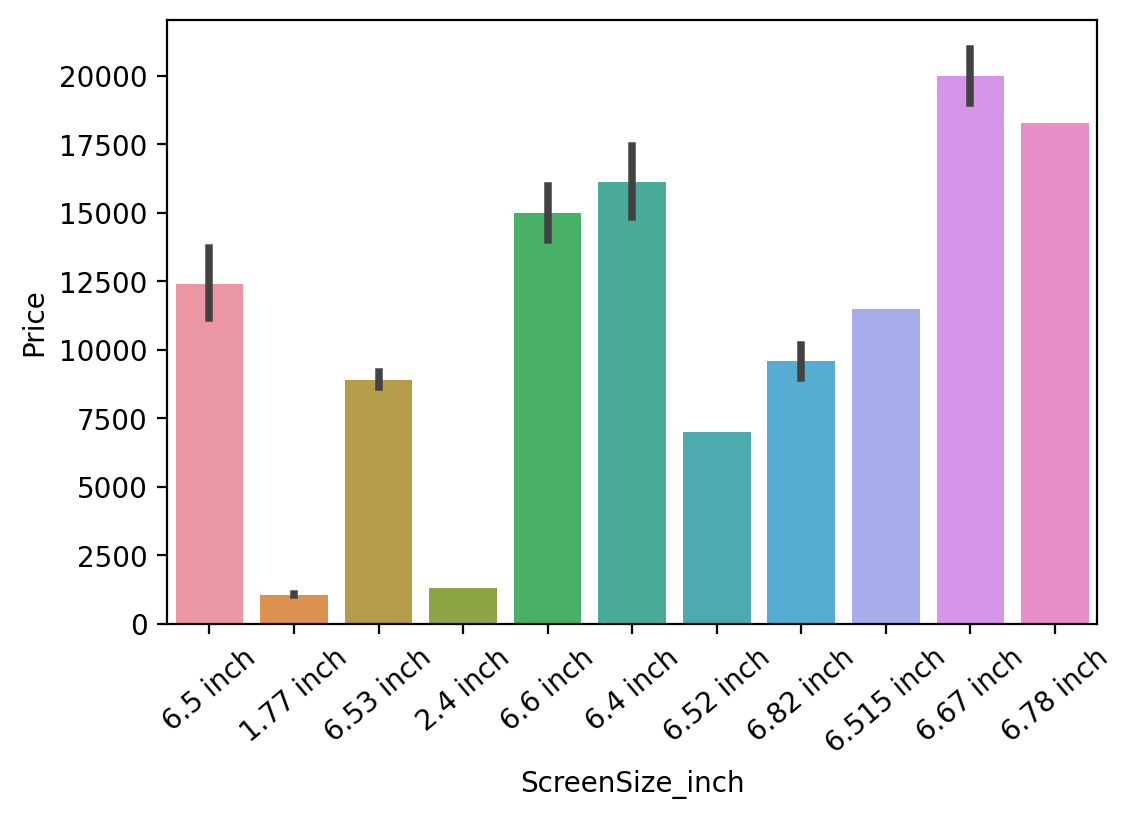

In [155]:
plt.figure(dpi = 200)
sns.barplot(data.ScreenSize_inch, data.Price)
plt.xticks(rotation = 40)

<Figure size 1200x800 with 0 Axes>

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '8.0'),
  Text(5, 0, '32.0')])

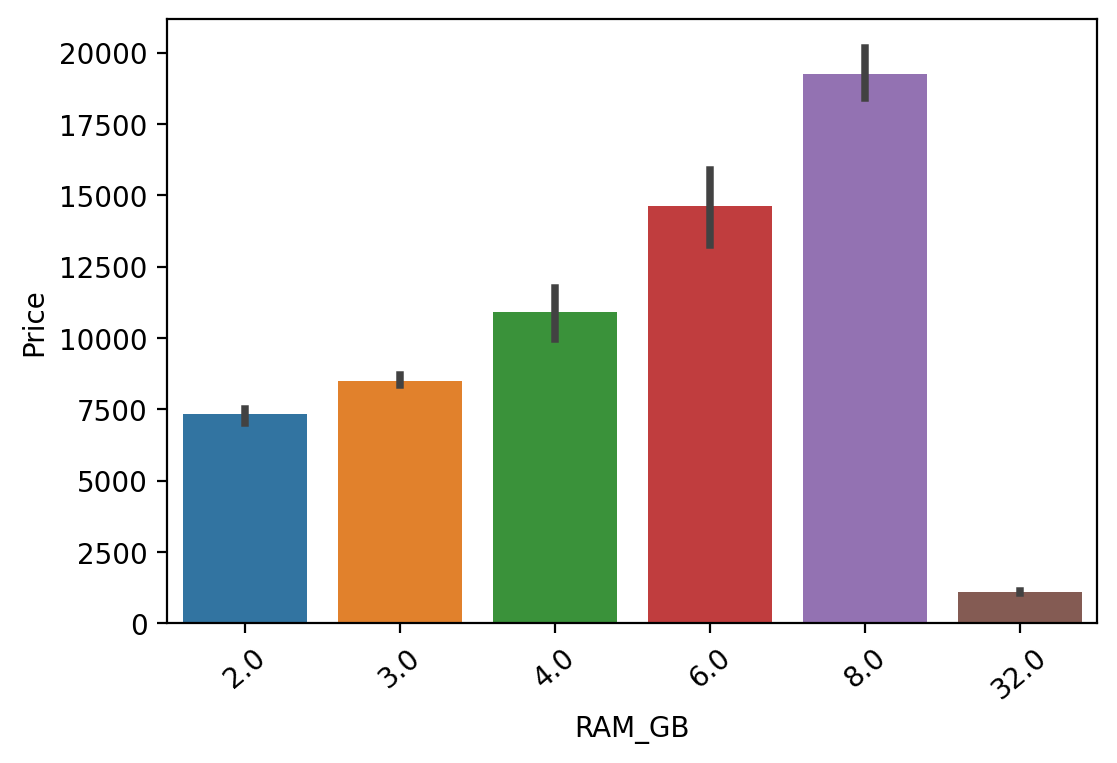

In [156]:
plt.figure(dpi = 200)
sns.barplot(data.RAM_GB, data.Price)
plt.xticks(rotation = 40)

<Figure size 1200x800 with 0 Axes>

C:\Users\Utkarsh\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Storage_GB', ylabel='Price'>

(array([0, 1, 2, 3]),
 [Text(0, 0, '3.0'),
  Text(1, 0, '32.0'),
  Text(2, 0, '64.0'),
  Text(3, 0, '128.0')])

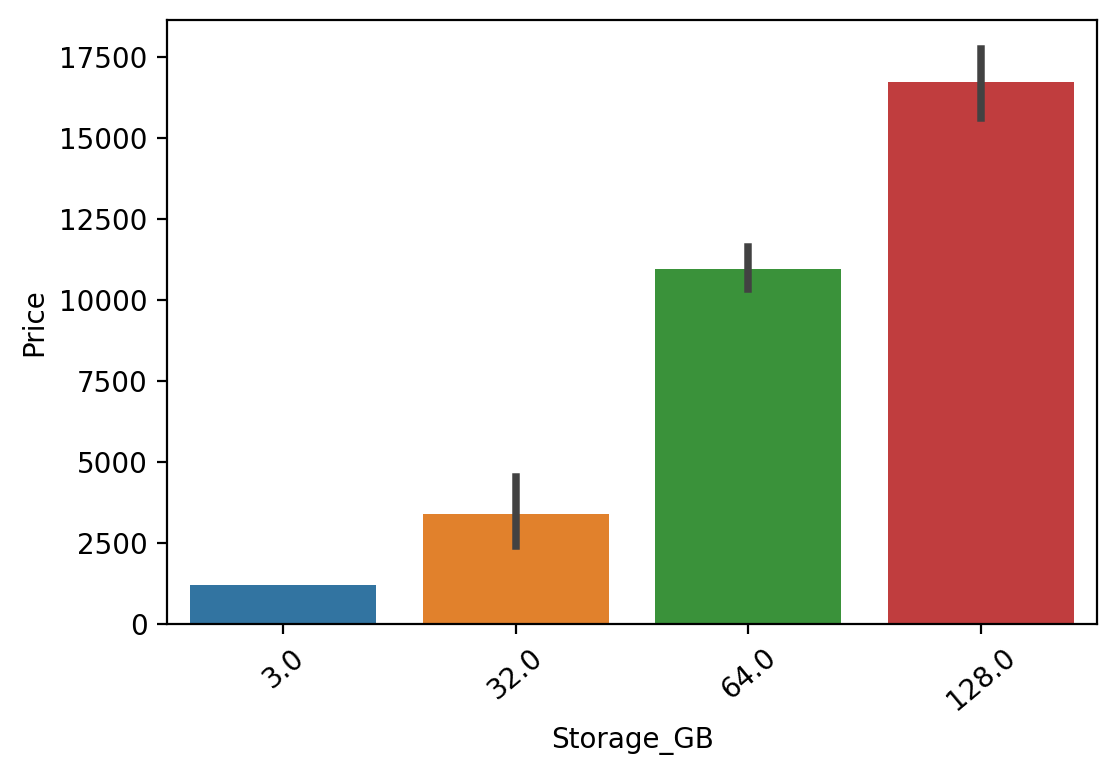

In [157]:
plt.figure(dpi = 200)
sns.barplot(data.Storage_GB, data.Price)
plt.xticks(rotation = 40)

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='Brand'>

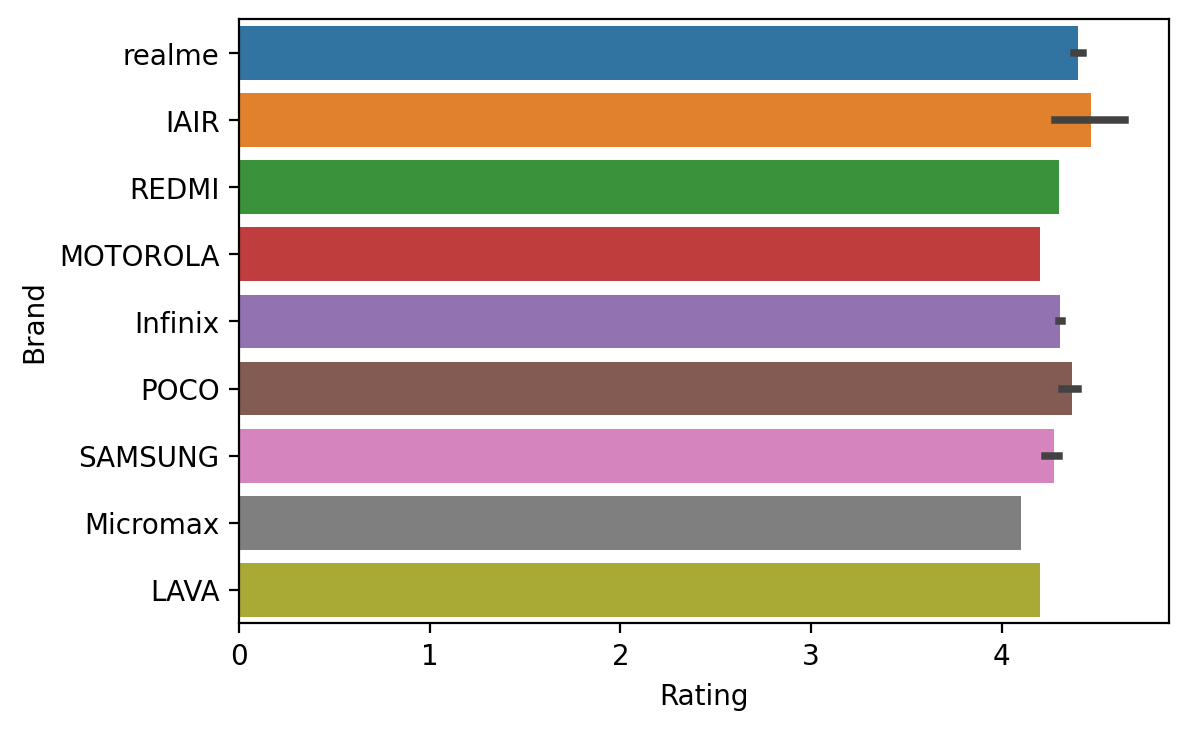

In [159]:
plt.figure(dpi = 200)
sns.barplot(y = data.Brand, x = data.Rating)

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:xlabel='Rating', ylabel='Brand'>

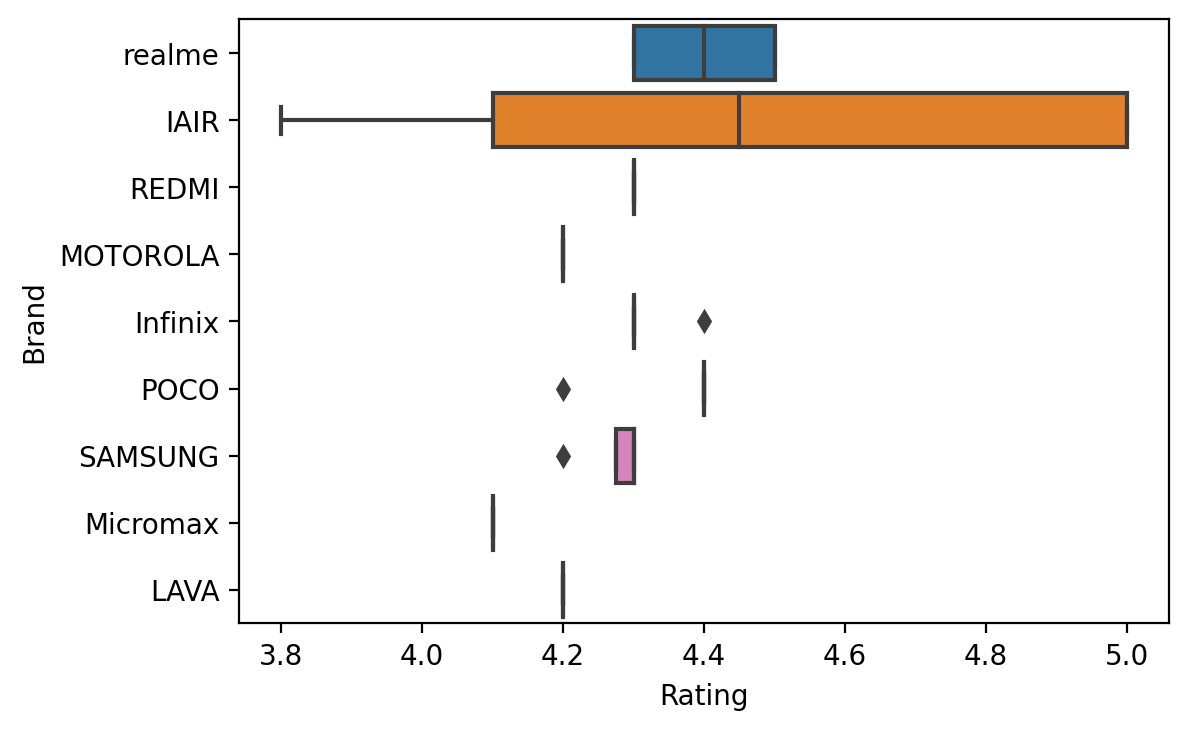

In [160]:
plt.figure(dpi = 200)
sns.boxplot(y = data.Brand, x = data.Rating)

<Figure size 3000x800 with 0 Axes>

<AxesSubplot:xlabel='Price'>

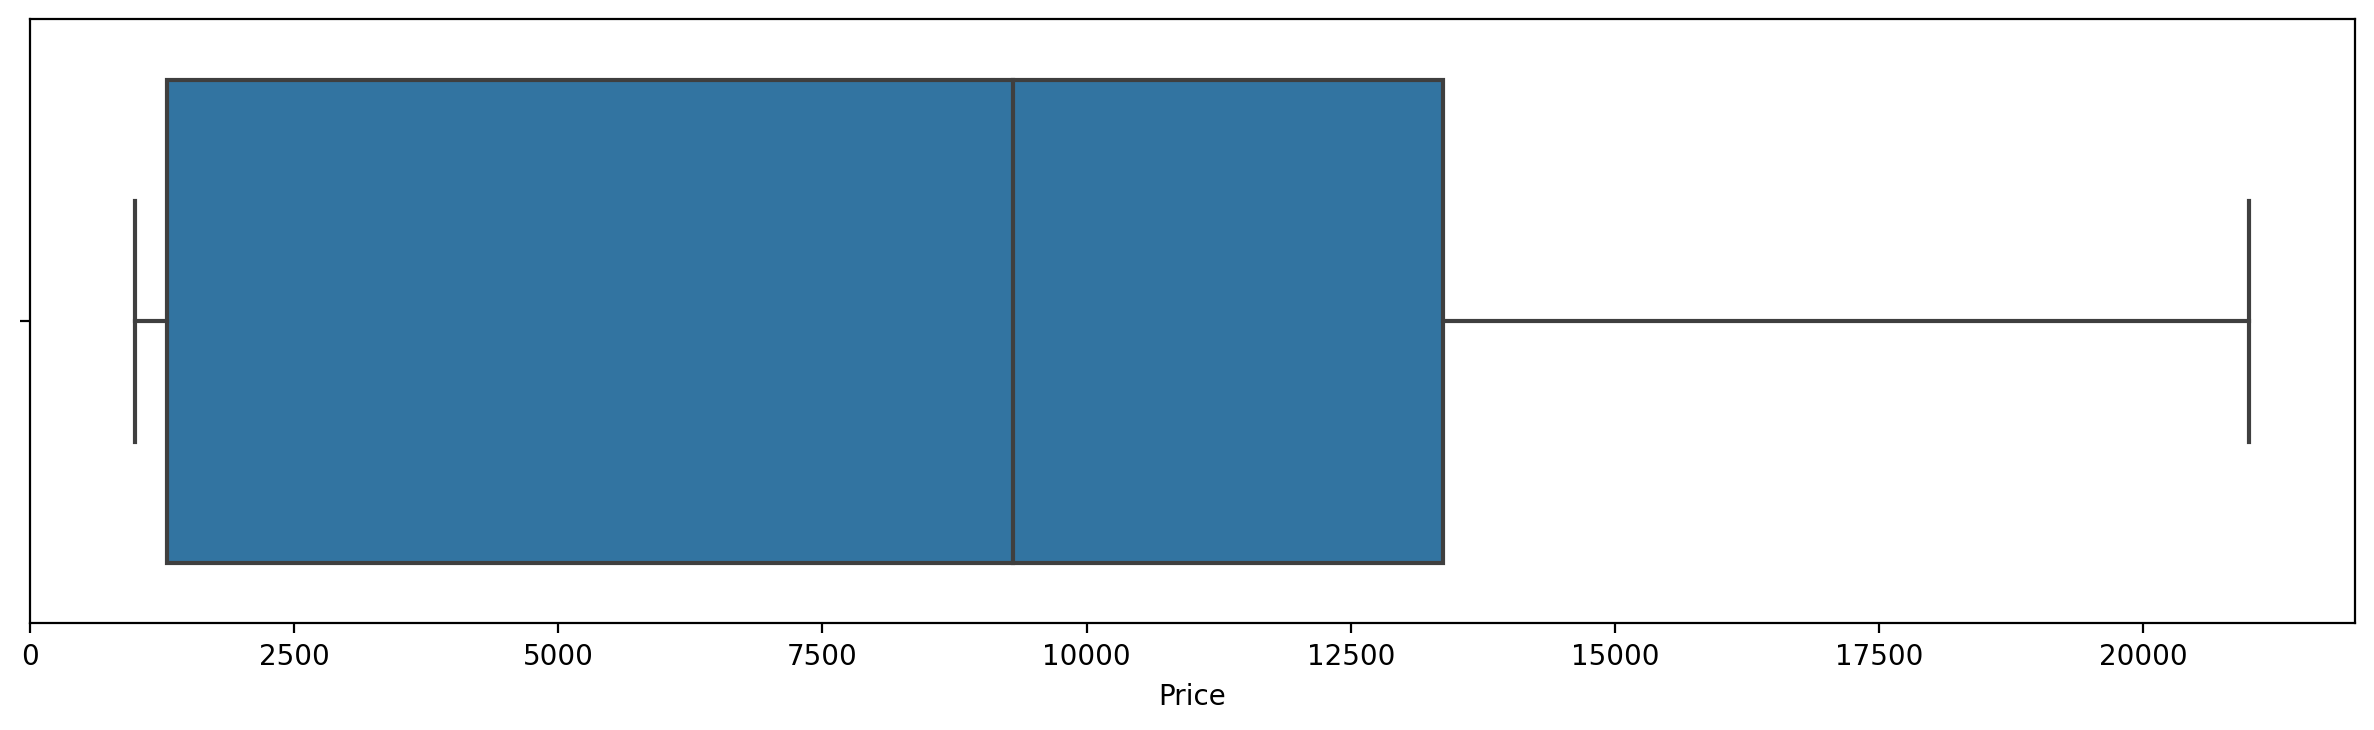

In [161]:
plt.figure(figsize=(15,4), dpi = 200)
sns.boxplot(data = data,x ='Price')

In [162]:
data.Price.min()

999.0